In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
housing=pd.read_csv("Data/train.csv")
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
corr_matrix=housing.corr(numeric_only=True)
top_features_numeric=corr_matrix['SalePrice'].sort_values(ascending=False)[:25]
attributes=list(top_features_numeric.index)
attributes

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch']

In [4]:
housing_num=housing[attributes].sort_values(by='SalePrice',ascending=False)
housing_num[:30]

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch
691,755000,10,4316,3,832,2444,2444,3,10,1994,...,104.0,382,1872,50,1,21535,0,989,4,0
1182,745000,10,4476,3,813,2396,2411,3,10,1996,...,160.0,171,2065,78,1,15623,1,300,4,0
1169,625000,10,3627,3,807,1930,1831,3,10,1995,...,118.0,361,1796,76,1,35760,1,543,4,0
898,611657,9,2364,3,820,2330,2364,2,11,2009,...,100.0,0,0,67,1,12919,1,142,2,0
803,582933,9,2822,3,1020,1734,1734,3,12,2008,...,107.0,52,1088,170,1,13891,0,1734,4,192
1046,556581,9,2868,3,716,1992,1992,3,11,2005,...,85.0,214,876,108,1,16056,0,1752,4,0
440,555000,10,2402,3,672,3094,2402,2,10,2008,...,105.0,0,0,72,0,15431,1,788,2,170
769,538000,8,3279,3,841,1650,1690,3,12,2003,...,47.0,503,1589,36,1,53504,1,234,4,210
178,501837,9,2234,3,1166,2216,2234,2,9,2008,...,63.0,0,0,60,0,17423,1,312,1,0
798,485000,9,3140,3,820,1926,1966,3,11,2008,...,104.0,144,1174,78,1,13518,0,1926,4,0


In [5]:
pd.set_option('display.max_columns',None)
housing_num.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1452.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,1978.506164,103.685262,0.613014,443.639726,70.049958,94.244521,346.992466,46.660274,0.382877,10516.828082,0.425342,567.240411,2.866438,15.060959
std,79442.502883,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,24.689725,181.066207,0.644666,456.098091,24.284752,125.338794,436.528436,66.256028,0.502885,9981.264932,0.518911,441.866955,0.815778,55.757415
min,34900.000000,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,1900.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000
25%,129975.000000,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,1961.000000,0.000000,0.000000,0.000000,59.000000,0.000000,0.000000,0.000000,0.000000,7553.500000,0.000000,223.000000,2.000000,0.000000
50%,163000.000000,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,1980.000000,0.000000,1.000000,383.500000,69.000000,0.000000,0.000000,25.000000,0.000000,9478.500000,0.000000,477.500000,3.000000,0.000000
75%,214000.000000,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,2002.000000,166.000000,1.000000,712.250000,80.000000,168.000000,728.000000,68.000000,1.000000,11601.500000,1.000000,808.000000,3.000000,0.000000
max,755000.000000,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,2010.000000,1600.000000,3.000000,5644.000000,313.000000,857.000000,2065.000000,547.000000,2.000000,215245.000000,3.000000,2336.000000,8.000000,480.000000


In [6]:
corr_matrix=housing.corr(numeric_only=True)
features_numeric=corr_matrix['SalePrice'].sort_values(ascending=False)
every_attributes=list(features_numeric.index)
every_attributes

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'Id',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr']

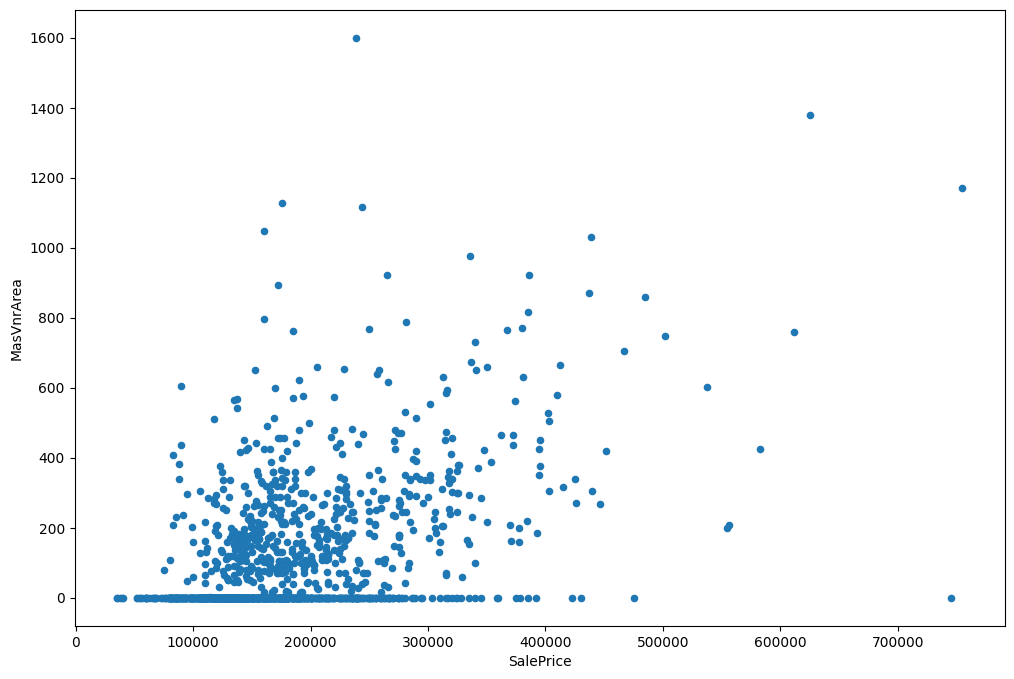

In [7]:
housing.plot(kind='scatter',x='SalePrice',y='MasVnrArea',figsize=(12,8))
plt.show()

In [8]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [9]:
housing_num[['GarageYrBlt','YearBuilt']]

,GarageYrBlt,YearBuilt
691,1994.0,1994
1182,1996.0,1996
1169,1995.0,1995
898,2009.0,2009
803,2009.0,2008
...,...,...
30,1920.0,1920
533,NaN,1946
968,NaN,1910
916,1958.0,1949


In [10]:
housing_num['GarageYrBlt'].fillna(housing_num['YearBuilt'],inplace=True)
housing_num.describe()

C:\Users\nichu\AppData\Local\Temp\ipykernel_22012\2966843963.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_num['GarageYrBlt'].fillna(housing_num['YearBuilt'],inplace=True)


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,1976.507534,103.685262,0.613014,443.639726,70.049958,94.244521,346.992466,46.660274,0.382877,10516.828082,0.425342,567.240411,2.866438,15.060959
std,79442.502883,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,26.306739,181.066207,0.644666,456.098091,24.284752,125.338794,436.528436,66.256028,0.502885,9981.264932,0.518911,441.866955,0.815778,55.757415
min,34900.000000,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,1872.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000
25%,129975.000000,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,1959.000000,0.000000,0.000000,0.000000,59.000000,0.000000,0.000000,0.000000,0.000000,7553.500000,0.000000,223.000000,2.000000,0.000000
50%,163000.000000,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,1978.000000,0.000000,1.000000,383.500000,69.000000,0.000000,0.000000,25.000000,0.000000,9478.500000,0.000000,477.500000,3.000000,0.000000
75%,214000.000000,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,2001.000000,166.000000,1.000000,712.250000,80.000000,168.000000,728.000000,68.000000,1.000000,11601.500000,1.000000,808.000000,3.000000,0.000000
max,755000.000000,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,2010.000000,1600.000000,3.000000,5644.000000,313.000000,857.000000,2065.000000,547.000000,2.000000,215245.000000,3.000000,2336.000000,8.000000,480.000000


In [11]:
housing_num['MasVnrArea'].fillna(0,inplace=True)
housing_num[['LotFrontage']]

C:\Users\nichu\AppData\Local\Temp\ipykernel_22012\2210354043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_num['MasVnrArea'].fillna(0,inplace=True)


,LotFrontage
691,104.0
1182,160.0
1169,118.0
898,100.0
803,107.0
...,...
30,50.0
533,50.0
968,50.0
916,50.0


In [12]:
housing_num['LotFrontage']=housing.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
housing_num.skew()

SalePrice        1.882876
OverallQual      0.216944
GrLivArea        1.366560
GarageCars      -0.342549
GarageArea       0.179981
TotalBsmtSF      1.524255
1stFlrSF         1.376757
FullBath         0.036562
TotRmsAbvGrd     0.676341
YearBuilt       -0.613461
YearRemodAdd    -0.503562
GarageYrBlt     -0.694329
MasVnrArea       2.677616
Fireplaces       0.649565
BsmtFinSF1       1.685503
LotFrontage      2.212959
WoodDeckSF       1.541376
2ndFlrSF         0.813030
OpenPorchSF      2.364342
HalfBath         0.675897
LotArea         12.207688
BsmtFullBath     0.596067
BsmtUnfSF        0.920268
BedroomAbvGr     0.211790
ScreenPorch      4.122214
dtype: float64

In [13]:
log_attributes=['SalePrice','GrLivArea','1stFlrSF','MasVnrArea','BsmtFinSF1','WoodDeckSF','OpenPorchSF','LotArea',]
housing_transform=housing_num
housing_transform[log_attributes]=np.log1p(housing_transform[log_attributes])
housing_transform['TotalBsmtSF']=housing_transform['TotalBsmtSF']**0.8
#housing_transform['ScreenPorch']=housing_transform['ScreenPorch']**0.9
housing_transform['LotFrontage']=housing_transform['LotFrontage']**0.5

housing_transform.skew()


SalePrice       0.121347
OverallQual     0.216944
GrLivArea      -0.006140
GarageCars     -0.342549
GarageArea      0.179981
TotalBsmtSF     0.526770
1stFlrSF        0.080114
FullBath        0.036562
TotRmsAbvGrd    0.676341
YearBuilt      -0.613461
YearRemodAdd   -0.503562
GarageYrBlt    -0.694329
MasVnrArea      0.503532
Fireplaces      0.649565
BsmtFinSF1     -0.618410
LotFrontage     0.281391
WoodDeckSF      0.153537
2ndFlrSF        0.813030
OpenPorchSF    -0.023397
HalfBath        0.675897
LotArea        -0.137404
BsmtFullBath    0.596067
BsmtUnfSF       0.920268
BedroomAbvGr    0.211790
ScreenPorch     4.122214
dtype: float64